In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
X= np.arange(10,20,0.13)
print(X[:3])
y= 1.229*X + 9.887
print(y[:3])
print (len(X),len(y))


[10.   10.13 10.26]
[22.177   22.33677 22.49654]
77 77


In [47]:
split = int(len(X)*0.8)
X_train, y_train=X[:split], y[:split]
X_test, y_test=X[split:], y[split:]


In [48]:
def plot_data(X_train=X_train,y_train=y_train,X_test=X_test, y_test=y_test,prediction=None):
    plt.scatter(X_train, y_train,c='b',label='Training data')
    plt.scatter(X_test, y_test,c='g',label='Training data')
    if prediction is not None:
        plt.scatter(X_test, prediction,c='r',label='predicted data')
    plt.legend()
    plt.show()


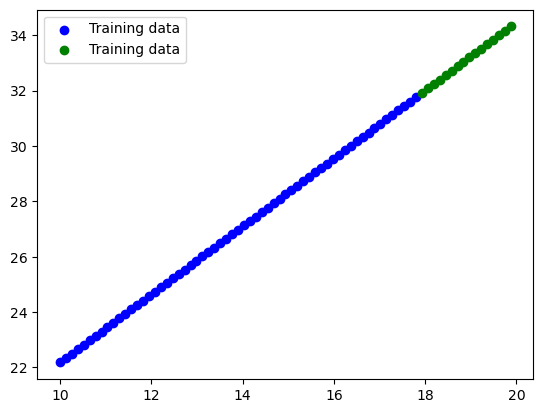

In [49]:
plot_data()

In [50]:
w = np.random.randn()
b = np.random.randn()
print(f'initially weight={w} and bias={b}')

initially weight=-1.3430906808950396 and bias=0.19806904585246635


In [51]:
def loss_fn(y_actual, y_out):
    return np.sum(np.square(y_actual - y_out))/len(y_actual)

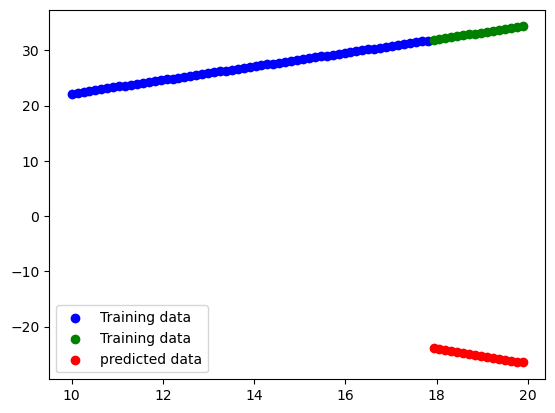

In [52]:
y_out  = X_test*w + b
plot_data(prediction = y_out)


In [53]:
lpha = 0.1
epochs =5
train_loss_list=[]
test_loss_list=[]
for epoch in range(epochs):
    #forward pass
    train_pred = X_train*w+b
    train_loss = loss_fn(y_actual=y_train,y_out=train_pred)
    # Compute the gradients
    gradientw=(-2/len(X_train))*np.sum((y_train-train_pred)*X_train)
    gradientb=(-2/len(X_train))*np.sum((y_train-train_pred))

    w = w - gradientw*lpha
    b = b - gradientb*lpha

    test_pred = X_test*w+b
    test_loss = loss_fn(y_actual=y_test, y_out=test_pred)
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    if(epochs+1)%10==0:
        print(f'Epoch {epochs+1}|Train Loss {train_loss:.4f} Test loss {test_loss:.4f}')
        

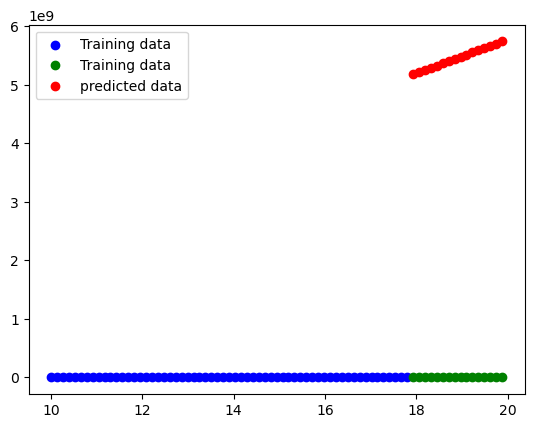

In [54]:
y_pred=X_test*w+b
plot_data(prediction=y_pred)

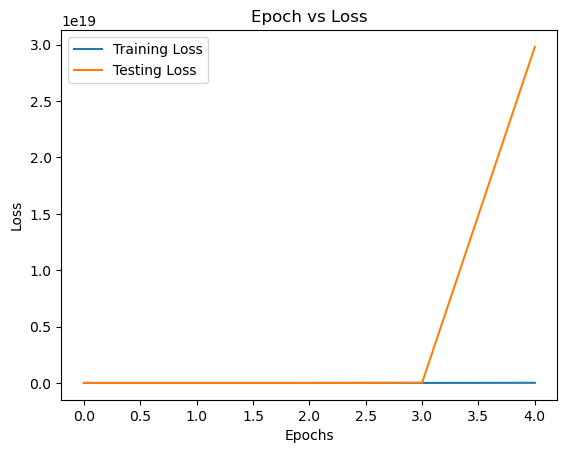

In [55]:
plt.plot(range(epochs),train_loss_list, label="Training Loss")
plt.plot(range(epochs),test_loss_list, label="Testing Loss")
plt.title("Epoch vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()